# Aufgabe 2:
sorry für Denglisch 

In [19]:
import numpy as np 
import matplotlib.pyplot as plt

In [20]:
E = 50 * 10 **9
m = 511 * 10**3
gamma = E/m
beta = np.sqrt(1-gamma**(-2))

**(a)** <br><br>
Berechnung von $\beta^2$

In [21]:
beta_square = beta**2
print(f"beta square = {beta_square}")

beta square = 0.9999999998955516


mit $\beta^2 = 0.9999999998955516$ folgt $$\frac{2+\sin^2(\theta)}{1-\beta^2 \cos^2(\theta)} \approx \frac{2+\sin^2(\theta)}{1-\cos^2(\theta)} $$
$$\Rarr \text{Unstable für: } \theta \rarr 0\quad \text{bzw.}\quad\theta \in (1\cdot10^{-9},1\cdot10^{-7}) \quad \text{(s. Plot)}$$
<br><br>
**(b)**  <br>
unter Verwendung der Hinweise lautet die umgeschriebene Funktion
$$f = \frac{2 \gamma^2 + \gamma^2 \sin^2\theta}{1 + \gamma^2 \beta^2 \sin^2\theta}$$

**(c)**

In [22]:
def function_unstable(theta):
    return (2 + np.sin(theta)**2) / (1 - beta**2 * np.cos(theta)**2)

def function_stable(theta):
    return (2 * gamma**2 + gamma**2 * np.sin(theta)**2 ) / (1 + gamma**2 * beta**2 * np.sin(theta)**2)

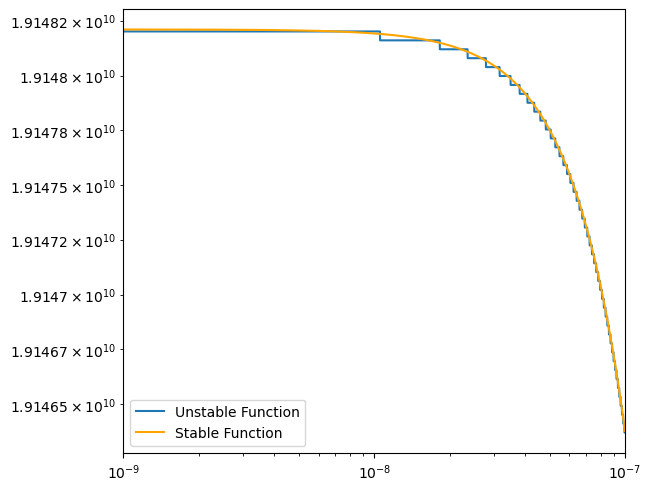

In [23]:
x = np.logspace(-9,-7, 10000)

fig1, (ax1) = plt.subplots(1, 1, layout="constrained")
ax1.plot(x, function_unstable(x), label="Unstable Function")
ax1.plot(x, function_stable(x), color= "orange", label="Stable Function")
ax1.set_xscale("log")
ax1.set_yscale("log")
plt.xlim(1e-9,1e-7)
ax1.legend(loc="best")


**(d)** <br>
In General: Condition Nummer $K = \left|x \frac{f'(x)}{f(x)}\right|$
<br><br> Here: <br>
$$\frac{\text{d}}{\text{d}\theta} f(E,\theta) = - \frac{2\cos\theta\sin\theta\big( \beta^2\sin^2\theta + \beta^2 \cos^2\theta +2\beta ^2 -1 \big)}{\big(\beta^2 \cos^2(\theta)-1 \big)^2}$$
$$= - \frac{2\cos\theta\sin\theta\big(3\beta ^2 -1 \big)}{\big(\beta^2 \cos^2(\theta)-1 \big)^2}$$
<br><br>
$$\Rarr K = \left| -\theta \cdot  \frac{2\cos\theta\sin\theta\big(3\beta ^2 -1 \big)}{\big(\beta^2 \cos^2(\theta)-1 \big)^2} \cdot \frac{1-\beta^2\cos^2\theta}{2+\sin^2\theta}\right|$$
<br><br>
keine lineare und keine exponentielle $\theta$-Abhängigkeit

**(e)**

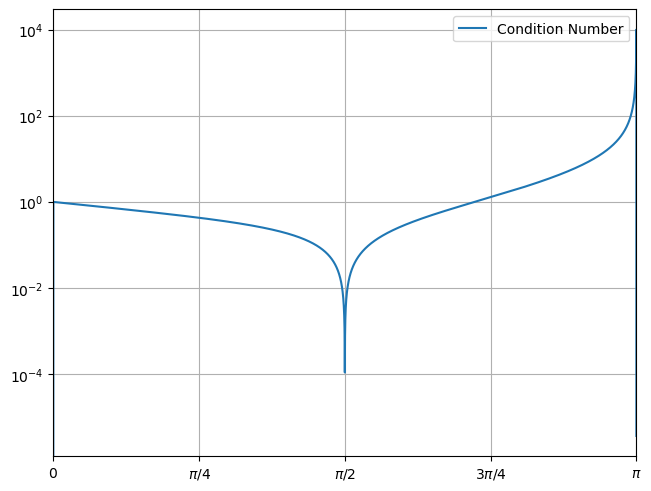

In [24]:
def condition_number(x):
    return np.abs(-x * (2 * np.cos(x) * np.sin(x)*(3 * beta**2 -1)* (1 - beta**2 * np.cos(x)**2))/((beta**2 * np.cos(x)**2 - 1)**2 *(2 + np.sin(x))**2))

x2 = np.linspace(0, np.pi, 10000)
# x2 = np.linspace(-np.pi, 2*np.pi, 10000)
labels = [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"]
fig3, ax3 = plt.subplots(1, 1, layout="constrained")
ax3.plot(x2, condition_number(x2), label="Condition Number")
ax3.set_xticks(np.arange(0, np.pi+0.01, np.pi/4))
ax3.set_xticklabels(labels)
ax3.set_yscale("log")
ax3.grid()
plt.xlim(0 ,np.pi)
ax3.legend(loc="best")

$\Rarr$ ill-conditioned for $K >> 1\Rarr$  $\theta \in [\frac{7}{8}\pi,\pi]$

**(f)**<br>
Stability bezieht sich auf den Algorithmus und Condition bezieht sich auf das (mathematische) Problem. Unter Stabilität versteht man den Einfluss von Rundungsfehlern auf eine störanfällige maschinelle Rechenmethode. "Instabilities" lassen sich umgehen, indem den Algorithmus umgeschrieben wird, wie in Aufgabenteil 2b. Z.B. kann es zu Rundungsfehlern kommen, weil man sich einer Polstelle nähert, wie in 2a-c.<br>
"Condition" beschreibt den Einfluss eines anfänglichen Fehlers auf eine präzisere maschinelle Rechenmethode. Die Condition lässt sich allerdings nicht durch Umschreiben des Algorithmus lösen. Z.B. ist ein Problem "well-conditioned", wenn bei einer kleinen Veränderung der Übergabe, sich das Ergbenis nur minimal ändert und "ill-conditioned", wenn bei einer kleinen Veränderung der Übergabe, sich das Ergebnis startk verändert.